2.1 obtaining time series data

In [301]:
pip install fredapi


Note: you may need to restart the kernel to use updated packages.


In [302]:
pip install pandas-datareader

     |████████████████████████████████| 109 kB 1.7 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [415]:
import fredapi as fa
import pandas as pd
from pandas import DataFrame as df
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np
import pandas_datareader as pdr
from sklearn.linear_model import LinearRegression


In [79]:
from fredapi import Fred
fred = Fred(api_key="60eeeaad2602ebcc6f293afdd4ae027d")

In [145]:
BTC = fred.get_series("CBBTCUSD")
GOLD = fred.get_series("ID7108")
SP5 = fred.get_series("SP500")

2001-12-01    100.0
2002-01-01     99.8
2002-02-01    101.8
2002-03-01    106.8
2002-04-01    106.4
              ...  
2021-11-01    649.7
2021-12-01    648.0
2022-01-01    655.7
2022-02-01    654.8
2022-03-01    699.4
Length: 244, dtype: float64

We are plotting induvidual plots for all assets

Text(0, 0.5, 'Frequency')

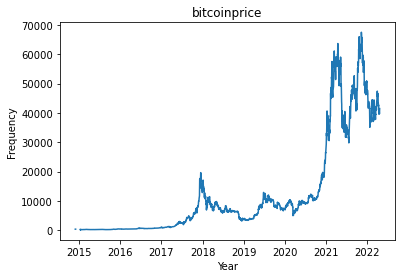

In [93]:
plt.plot(BTC)
plt.title("bitcoinprice")
plt.xlabel("Year")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

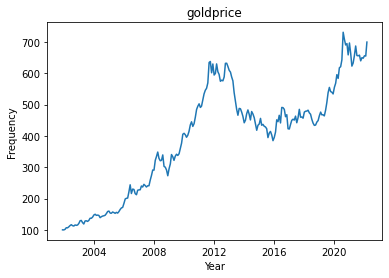

In [94]:
plt.plot(GOLD)
plt.title("goldprice")
plt.xlabel("Year")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

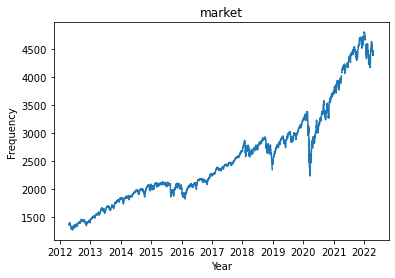

In [95]:
plt.plot(SP5)
plt.title("market")
plt.xlabel("Year")
plt.ylabel("Frequency")

We are making a plot for all assets in one

<AxesSubplot:>

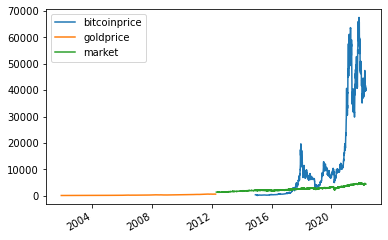

In [253]:
df = {}
df['bitcoinprice'] = fred.get_series('CBBTCUSD')
df['goldprice'] = fred.get_series('ID7108')
df['market'] = fred.get_series('SP500')
df = pd.DataFrame(df)
df.plot()

2.2 We are geting data from january 2016

In [248]:
BTC2016 = fred.get_series('CBBTCUSD', observation_start='2016-01-01')
BTC2016

2016-01-01      435.66
2016-01-02      435.40
2016-01-03      431.91
2016-01-04      433.85
2016-01-05      433.34
                ...   
2022-04-15    40566.60
2022-04-16    40378.25
2022-04-17    39670.73
2022-04-18    40817.48
2022-04-19    41480.25
Length: 2301, dtype: float64

In [250]:
GOLD2016 = fred.get_series('ID7108', observation_start='2016-01-01')
GOLD2016

2016-01-01    395.0
2016-02-01    412.4
2016-03-01    451.2
2016-04-01    445.4
2016-05-01    465.7
              ...  
2021-11-01    649.7
2021-12-01    648.0
2022-01-01    655.7
2022-02-01    654.8
2022-03-01    699.4
Length: 75, dtype: float64

In [251]:
SP5002016 = fred.get_series('SP500', observation_start='2016-01-01')
SP5002016

2016-01-01        NaN
2016-01-04    2012.66
2016-01-05    2016.71
2016-01-06    1990.26
2016-01-07    1943.09
               ...   
2022-04-13    4446.59
2022-04-14    4392.59
2022-04-15        NaN
2022-04-18    4391.69
2022-04-19    4462.21
Length: 1643, dtype: float64

We are changing the freaquency from daily to monthly

In [475]:
BTCM = fred.get_series('CBBTCUSD', observation_start='2016-01-01', observation_end = "2022-03-01", frequency = 'm' )
BTCM

2016-01-01      410.63
2016-02-01      403.36
2016-03-01      414.70
2016-04-01      436.09
2016-05-01      463.50
                ...   
2021-11-01    60722.93
2021-12-01    49332.71
2022-01-01    41110.41
2022-02-01    40757.13
2022-03-01    41955.96
Length: 75, dtype: float64

In [473]:
GOLDM = fred.get_series('ID7108', observation_start='2016-01-01', observation_end = "2022-03-01", frequency = 'm')
GOLDM

2016-01-01    395.0
2016-02-01    412.4
2016-03-01    451.2
2016-04-01    445.4
2016-05-01    465.7
              ...  
2021-11-01    649.7
2021-12-01    648.0
2022-01-01    655.7
2022-02-01    654.8
2022-03-01    699.4
Length: 75, dtype: float64

In [476]:
SP5M = fred.get_series('SP500', observation_start='2016-01-01', observation_end = "2022-03-01", frequency = 'm')
SP5M

2016-01-01    1918.60
2016-02-01    1904.42
2016-03-01    2021.95
2016-04-01    2075.54
2016-05-01    2065.55
               ...   
2021-11-01    4667.39
2021-12-01    4674.77
2022-01-01    4573.82
2022-02-01    4435.98
2022-03-01    4391.27
Length: 75, dtype: float64

Here we are transforming monthly price observations into monthly returns 

In [483]:
BitcoinMRt = pd.DataFrame(BTCM, columns = ["BTCPrice"])
BitcoinMRt['pct_change'] = BitcoinMRt.BTCPrice.pct_change()
BitcoinMRt['log_ret'] = np.log(BitcoinMRt.BTCPrice) - np.log(BitcoinMRt.BTCPrice.shift(1))
BitcoinMRtd = BitcoinMRt.dropna()
BitcoinMRtd

,BTCPrice,pct_change,log_ret
2016-02-01,403.36,-0.017705,-0.017863
2016-03-01,414.70,0.028114,0.027726
2016-04-01,436.09,0.051579,0.050293
2016-05-01,463.50,0.062854,0.060958
2016-06-01,644.59,0.390701,0.329808
...,...,...,...
2021-11-01,60722.93,0.048490,0.047351
2021-12-01,49332.71,-0.187577,-0.207734
2022-01-01,41110.41,-0.166670,-0.182326
2022-02-01,40757.13,-0.008593,-0.008631


In [487]:
rbt = BitcoinMRtd.log_ret
rbt

2016-02-01   -0.017863
2016-03-01    0.027726
2016-04-01    0.050293
2016-05-01    0.060958
2016-06-01    0.329808
                ...   
2021-11-01    0.047351
2021-12-01   -0.207734
2022-01-01   -0.182326
2022-02-01   -0.008631
2022-03-01    0.028990
Name: log_ret, Length: 74, dtype: float64

In [484]:
GOLDMRt = pd.DataFrame(GOLDM, columns = ["GOLDPrice"])
GOLDMRt['pct_change'] = GOLDMRt.GOLDPrice.pct_change()
GOLDMRt['log_ret'] = np.log(GOLDMRt.GOLDPrice) - np.log(GOLDMRt.GOLDPrice.shift(1))
GOLDMRtd = GOLDMRt.dropna()
GOLDMRtd

,GOLDPrice,pct_change,log_ret
2016-02-01,412.4,0.044051,0.043108
2016-03-01,451.2,0.094083,0.089917
2016-04-01,445.4,-0.012855,-0.012938
2016-05-01,465.7,0.045577,0.044569
2016-06-01,441.3,-0.052394,-0.053817
...,...,...,...
2021-11-01,649.7,0.015950,0.015824
2021-12-01,648.0,-0.002617,-0.002620
2022-01-01,655.7,0.011883,0.011813
2022-02-01,654.8,-0.001373,-0.001374


In [488]:
rgt = GOLDMRtd.log_ret
rgt

2016-02-01    0.043108
2016-03-01    0.089917
2016-04-01   -0.012938
2016-05-01    0.044569
2016-06-01   -0.053817
                ...   
2021-11-01    0.015824
2021-12-01   -0.002620
2022-01-01    0.011813
2022-02-01   -0.001374
2022-03-01    0.065893
Name: log_ret, Length: 74, dtype: float64

In [489]:
SP5MRt = pd.DataFrame(SP5M, columns = ["SP500Price"])
SP5MRt['pct_change'] = SP5MRt.SP500Price.pct_change()
SP5MRt['log_ret'] = np.log(SP5MRt.SP500Price) - np.log(SP5MRt.SP500Price.shift(1))
SP5MRtd = SP5MRt.dropna()
SP5MRtd

,SP500Price,pct_change,log_ret
2016-02-01,1904.42,-0.007391,-0.007418
2016-03-01,2021.95,0.061714,0.059885
2016-04-01,2075.54,0.026504,0.026159
2016-05-01,2065.55,-0.004813,-0.004825
2016-06-01,2083.89,0.008879,0.008840
...,...,...,...
2021-11-01,4667.39,0.046333,0.045292
2021-12-01,4674.77,0.001581,0.001580
2022-01-01,4573.82,-0.021595,-0.021831
2022-02-01,4435.98,-0.030137,-0.030600


In [490]:
rmt = SP5MRtd.log_ret
rmt

2016-02-01   -0.007418
2016-03-01    0.059885
2016-04-01    0.026159
2016-05-01   -0.004825
2016-06-01    0.008840
                ...   
2021-11-01    0.045292
2021-12-01    0.001580
2022-01-01   -0.021831
2022-02-01   -0.030600
2022-03-01   -0.010130
Name: log_ret, Length: 74, dtype: float64

2.3 Data analysis



In [491]:
rbt.corr(rgt)

-0.08808474900053936

This is the correlation between bitcoin and gold

correlation looks at relationship between two variables, “Bitcoin” and “Gold” in this particular example.

A negative correlation, between two variables, indicates that one variable increases while the other decreases, and vice-versa.

since we have a negative correlation between Bitcoin and GOLD this means that when Bitcoin increases, then gold deacreases. This cuold be why bitcoin is viewd as an alternative to gold


In [492]:
rbt.corr(rmt)

0.381078222370206

This is the correlation between bitcoin and the market

correlation looks at relationship between two variables, “Bitcoin” and “market” in this particular example.

A posetive correlation, between two variables, indicates that when one variable increases the other variable also increases, and vice-versa.

Between bitcoin and the market, the corralation is positive. This means that when the market increases, bitcoin increases as well.


We are using OLS regression

In [512]:
import statsmodels.api as sm

In [516]:
x = rbt.tolist()
y = rgt.tolist()

In [517]:
x = sm.add_constant(x)

In [518]:
result = sm.OLS(y, x).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.5630
Date:                Thu, 28 Apr 2022   Prob (F-statistic):              0.455
Time:                        15:50:05   Log-Likelihood:                 134.67
No. Observations:                  74   AIC:                            -265.3
Df Residuals:                      72   BIC:                            -260.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0088      0.005      1.819      0.0

Alpha is 0.0088 and beta is -0.0175. The Alpha is the Intercept/const Coefficient and the Beta is the X Variable 1 Coefficient.
this means when the beta(gold) increases by one, then it will have a negative effect on the aplha(bitcoin)

In [509]:
x = rbt.tolist()
y = rmt.tolist()

In [510]:
x = sm.add_constant(x)

In [511]:
result = sm.OLS(y, x).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     12.23
Date:                Thu, 21 Apr 2022   Prob (F-statistic):           0.000809
Time:                        14:24:31   Log-Likelihood:                 147.47
No. Observations:                  74   AIC:                            -290.9
Df Residuals:                      72   BIC:                            -286.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0069      0.004      1.693      0.0

Alpha is 0.0069 and beta is 0.0686

The Alpha is the Intercept/const Coefficient and the Beta is the X Variable 1 Coefficient.
Interpurate the result 


this means when the beta(market) increases by one, then it will have a posetive effect on the aplha(bitcoin)

We could say that this model explain the total variation better then the other regressionmodel since the R-squared is higher.


The standard R-squared is 0.025 or 2.5%. This is a ratio that shows us how well our model is doing at explaining the total variation.  